In [1]:
import copy
from IPython.display import display, Image
import hashlib
import logging
import numpy
import os
import pandas
import pdb
import plotly
import pprint
import pyarrow
import pyarrow.parquet as pq
import six
import sys
import tensorflow as tf
import time

import CS230

plotly.offline.init_notebook_mode(connected=True)

In [2]:
file_paths = CS230.data.get_all_file_paths()

In [13]:
file_paths

['/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130810_02_01_01_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130811_01_01_01_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130811_02_01_01_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130815_01_01_02_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130816_01_01_02_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130817_01_01_02_grandsport.parquet',
 '/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Mot

In [64]:
file_path = file_paths[0]

df = CS230.data.load(file_path)
#df = CS230.data.stride_rows(df, stride=100)
df, derivative_columns = CS230.data.add_derivatives(df, strides=[1])
df = CS230.data.clean_discontinuities(df, stride=1)

In [65]:
file_path

'/home/dave/code/github/davidcasterton/CS230_project/data/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport.parquet'

In [66]:
df.head()

,time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,...,deriv_1_rollRate,deriv_1_vxCG,deriv_1_vyCG,deriv_1_vzCG,deriv_1_wheelAccelFL,deriv_1_wheelAccelFR,deriv_1_wheelAccelRL,deriv_1_wheelAccelRR,deriv_1_yawAngle,deriv_1_yawRate
0,0.000,29.3,0.7,2.3,13.2,204,5.0,61377.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001,29.4,0.7,1.9,13.2,204,5.0,61377.09,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.1,-0.1,0.0,0.17,0.0,0.0
2,0.002,29.4,0.7,1.9,13.2,204,5.0,61377.09,NaN,NaN,...,0.0,0.0,0.0,0.0,-0.1,0.0,0.1,0.09,0.0,0.0
3,0.003,29.4,0.7,1.4,13.2,204,5.0,61377.09,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.01,0.0,0.0
4,0.004,29.4,0.7,0.9,13.2,204,5.0,61377.09,NaN,NaN,...,0.0,0.0,0.0,0.0,0.1,-0.1,0.0,-0.12,0.0,0.0


images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-0-None-100-313a19e.jpeg


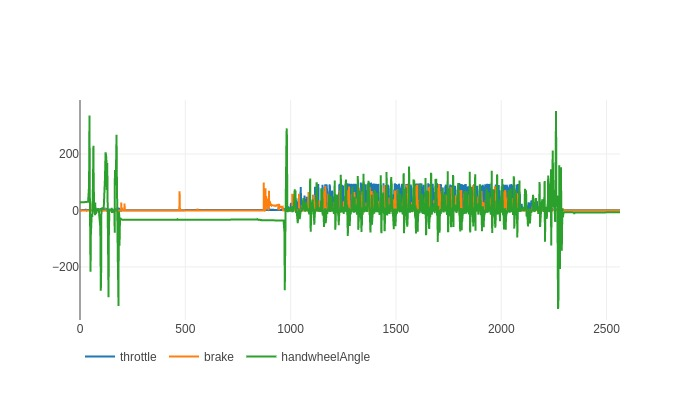

In [67]:
fig, image_path = CS230.data.plot(df, file_path, columns=['throttle', 'brake', 'handwheelAngle'], 
                                  plot=False, write=True, start=0, stop=None, step=100, title='')
print(image_path)
display(Image(image_path))

images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-12500-13000-1-cd12f64.jpeg


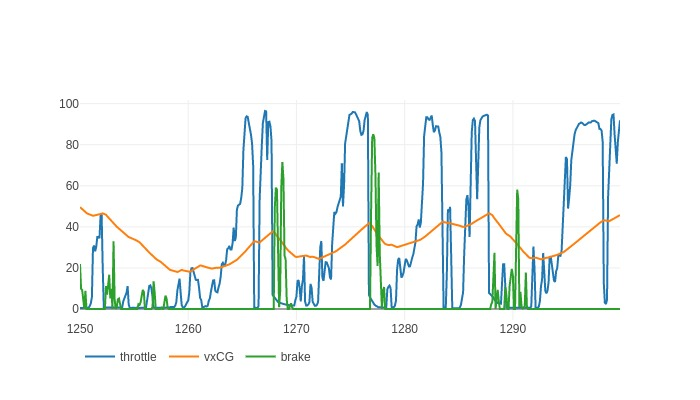

In [5]:
fig, image_path = CS230.data.plot(df, file_path, columns=['throttle', 'vxCG', 'brake'], 
                                  plot=False, write=True, start=12500, stop=13000, step=1, title='')
print(image_path)
display(Image(image_path))

images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-12500-13000-1-9103b57.jpeg


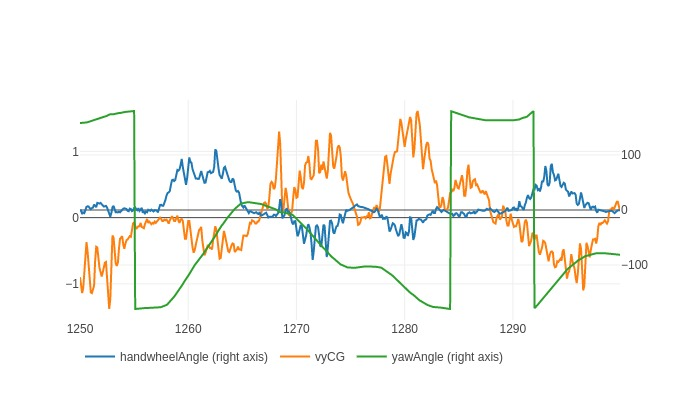

In [8]:
fig, image_path = CS230.data.plot(df, file_path, columns=['handwheelAngle', 'vyCG', 'yawAngle'], 
                                  plot=False, write=True, start=12500, stop=13000, step=1, title='')
print(image_path)
display(Image(image_path))

In [7]:
file_path = file_paths[1]

df = CS230.data.load(file_path)

In [11]:
df.iloc[1000:1020]

,time,handwheelAngle,throttle,brake,clutch,engineSpeed,PPS,gpsTime,latitude,longitude,...,chassisAccelRL,chassisAccelRR,deflectionFL,deflectionFR,deflectionRL,deflectionRR,wheelAccelFL,wheelAccelFR,wheelAccelRL,wheelAccelRR
1000,1.000,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.722,-9.712,0.0,-0.001,0.003,-0.0,10.10,9.61,9.71,10.06
1001,1.001,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.722,-9.712,0.0,-0.001,0.003,-0.0,10.10,9.61,9.71,10.07
1002,1.002,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.722,-9.712,0.0,-0.001,0.003,-0.0,10.20,9.71,9.81,10.00
1003,1.003,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.712,-9.712,0.0,-0.001,0.003,-0.0,10.10,9.81,9.91,9.91
1004,1.004,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.712,-9.712,0.0,-0.001,0.003,-0.0,10.20,9.81,10.01,9.88
1005,1.005,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.702,-9.712,0.0,-0.001,0.003,-0.0,10.20,9.91,9.91,9.87
1006,1.006,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.702,-9.712,0.0,-0.001,0.003,-0.0,10.40,10.01,9.81,9.88
1007,1.007,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.682,-9.712,0.0,-0.001,0.003,-0.0,10.40,10.10,9.81,9.99
1008,1.008,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.682,-9.712,0.0,-0.001,0.003,-0.0,10.20,10.01,9.71,9.96
1009,1.009,206.7,0.9,0.0,14.8,204,5.0,80426.29,NaN,NaN,...,-9.682,-9.712,0.0,-0.001,0.003,-0.0,10.10,9.91,9.81,9.82


In [9]:
1e-3

0.001

In [57]:
file_path = file_paths[-5]

In [58]:
df = CS230.data.load(file_path)
#df = CS230.data.stride_rows(df, stride=10)

images/2014_Targa_Sixty-Six/20140221_03_02_03_250lm-0-None-100-313a19e.jpeg


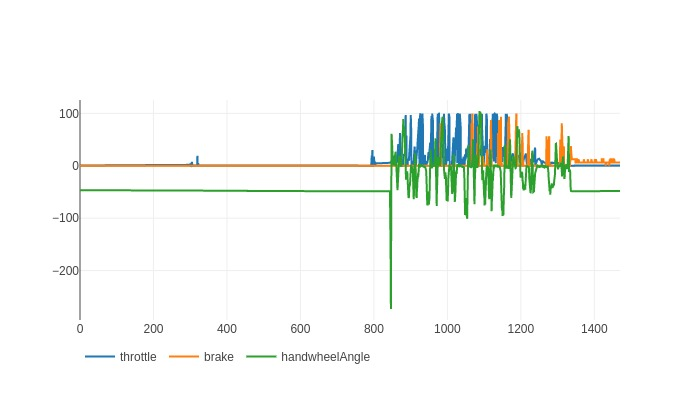

In [62]:
fig, image_path = CS230.data.plot(df, file_path, columns=['throttle', 'brake', 'handwheelAngle'], 
                                  plot=False, write=True, start=0, stop=None, step=100, title='')
print(image_path)
display(Image(image_path))